In [129]:
import pandas as pd
import time
import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
batt = pd.read_csv("allbatterylevels_limited.csv")
batt.sort_values('ts')

,phone_number,ts,level
490688,4087479586,1534809602,15
596588,5038942805,1534809604,29
1105468,7738700842,1534809605,43
61454,2149062229,1534809606,79
648413,5105087332,1534809607,84
...,...,...,...
750055,5743390378,1542823154,30
750056,5743390378,1542823215,31
750057,5743390378,1542823277,32
750058,5743390378,1542823338,33


In [31]:
#batt['ts_hr'] = round(batt['ts']/100,0)
#batt.astype({'ts': 'int32'}).dtypes
#batt['ts'] = int(batt['ts'])
#batt['datetime'] = time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(batt['ts']))

In [107]:
batt['dayofweek'] = round((batt['ts'] - 86400) % (86400*7) / 86400,0)
batt['dayofweek'] = batt['dayofweek'].astype(int)

In [108]:
batt.dayofweek.replace(0, 7,inplace=True)
batt

,phone_number,ts,level,mod,dayofweek
0,2018159770,1534913282,81,535682,5
1,2018159770,1534913877,80,536277,5
2,2018159770,1534915206,79,537606,5
3,2018159770,1534917026,78,539426,5
4,2018159770,1534918867,77,541267,5
...,...,...,...,...,...
1461799,9897454601,1541473163,24,442763,4
1461800,9897454601,1541473225,25,442825,4
1461801,9897454601,1541473286,26,442886,4
1461802,9897454601,1541473348,27,442948,4


In [122]:
grouped = batt[['dayofweek','level', 'ts']].groupby(['dayofweek', 'level'], as_index = False).count()
grouped

,dayofweek,level,ts
0,1,0,118
1,1,1,222
2,1,2,298
3,1,3,374
4,1,4,450
...,...,...,...
702,7,96,1883
703,7,97,1790
704,7,98,1698
705,7,99,1580


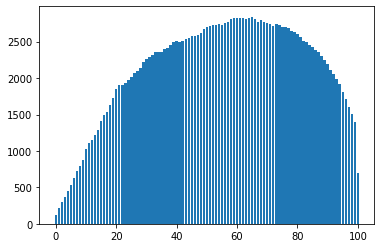

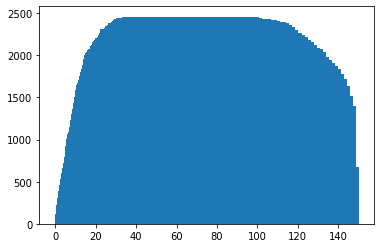

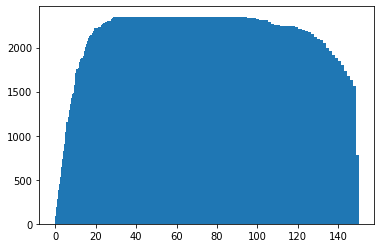

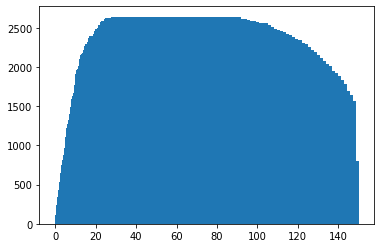

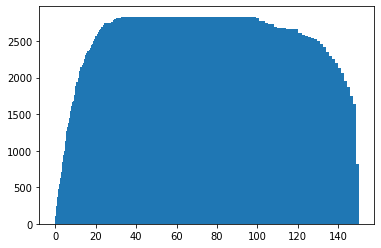

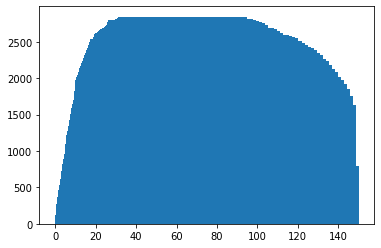

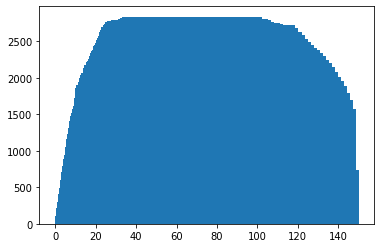

In [134]:
for i in range(1,8):
    x = grouped[grouped['dayofweek'] == i].level
    y = grouped[grouped['dayofweek']== i].ts
    plt.figure()
    plt.bar(x,y)

In [78]:
a = datetime.datetime.utcfromtimestamp(1575435740).replace(tzinfo=datetime.timezone.utc)
a

datetime.datetime(2019, 12, 4, 5, 2, 20, tzinfo=datetime.timezone.utc)

In [95]:
b = time.strftime("%a %d %b %Y %H:%M:%S", time.localtime(1575435740))
b

'Wed 04 Dec 2019 00:02:20'

In [85]:
a.hour

5

In [100]:
b.split()[4]

'00:02:20'